In [491]:
# Python program to scrape heading tags
import pickle
from IPython import display
import math
from pprint import pprint
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import os
import spacy
from textblob import TextBlob
from pattern.en import sentiment
import urllib3 
import re
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

nlp = spacy.load('en_core_web_sm')
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

cleanData = []
tag_words = []
regex = re.compile('[^a-zA-Z]')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"} 
#find what headers you are sending here: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending

url_link = 'https://nytimes.com' #define URL to scrape
utc_datetime = datetime.datetime.utcnow()
date_string = utc_datetime.strftime("%Y-%m-%d-%H%M_UTC")
filename = f'{url_link[12:-5]}_{date_string}'


# scrape a chosen URL
request = requests.get(url_link, headers=headers)
Soup = BeautifulSoup(request.text, 'lxml') #create soup obejct

if request.status_code == 200: #error handling for URL request
    print('Request successful.')
elif request.status_code == 404:
    print('Error 404: Not Found.')
    

# creating a list by type of heading tags
heading_tags = ["h1","h2","h3"] #the user will have to determine what "h" tags are valid for given URL
for tags in Soup.find_all(heading_tags):
    tag_words.append(tags.text.strip())
#     lower_words = [strg.lower() for strg in tag_words] #some sentiment analyzers analyze case
    
for i in tag_words:  #slice based on data you want to include. Some junk data can be removed
    if len(i) > 16:    #Fliter a composite length of strings based on targeted threshold
        cleanData.append(regex.sub(' ', i))

deDup = list(set(cleanData))

with open(filename, "wb") as fp: #Pickling data as list with UTC time stamp
    pickle.dump(deDup, fp)

# with open(filename,'w') as a: # uncomment if you want to save a text copy to avoid utf-8 error message
#     a.write('\n'.join(cleanData))




Request successful.


In [492]:
with open(filename, "rb") as fp: #Either load stored variable value for "filename" or saved pickled "example_1_0_23"
    saved_text = pickle.load(fp)

saved_text[0:5] #confirm your expected text is correct

['Lionel Messi  Cristiano Ronaldo and the Pursuit of Commercial Supremacy',
 'On Day   of Well s   Day Happiness Challenge  put a social plan on the calendar ',
 'Benedict s Burial Leaves Francis Alone  and Unbound',
 'Tell Us About Your Strangest Terms of Endearment',
 'Did you follow the news this week  Take our quiz ']

In [493]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA() 
results = []

for line in saved_text:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results, width=100) #print textual composite sentiment scores

[{'compound': 0.0516,
  'headline': 'Lionel Messi  Cristiano Ronaldo and the Pursuit of Commercial Supremacy',
  'neg': 0.0,
  'neu': 0.882,
  'pos': 0.118},
 {'compound': 0.7184,
  'headline': 'On Day   of Well s   Day Happiness Challenge  put a social plan on the calendar ',
  'neg': 0.0,
  'neu': 0.588,
  'pos': 0.412},
 {'compound': -0.25,
  'headline': 'Benedict s Burial Leaves Francis Alone  and Unbound',
  'neg': 0.25,
  'neu': 0.75,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Tell Us About Your Strangest Terms of Endearment',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Did you follow the news this week  Take our quiz ',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'Review   Age of Vice ', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.3182,
  'headline': 'A Skeptical Take on the A I  Revolution',
  'neg': 0.365,
  'neu': 0.635,
  'pos': 0.0},
 {'compound': 0.4019,
  'headline': 'U S D A  Approves First Va

In [494]:
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,headline
0,0.000,0.882,0.118,0.0516,Lionel Messi Cristiano Ronaldo and the Pursui...
1,0.000,0.588,0.412,0.7184,On Day of Well s Day Happiness Challenge ...
2,0.250,0.750,0.000,-0.2500,Benedict s Burial Leaves Francis Alone and Un...
3,0.000,1.000,0.000,0.0000,Tell Us About Your Strangest Terms of Endearment
4,0.000,1.000,0.000,0.0000,Did you follow the news this week Take our quiz
...,...,...,...,...,...
74,0.000,1.000,0.000,0.0000,Is New York Turning Into Los Angeles
75,0.000,1.000,0.000,0.0000,Read the Veggie Newsletter
76,0.400,0.600,0.000,-0.2500,Don t Cancel Those Plans
77,0.423,0.577,0.000,-0.6597,Ukraine s Quest to Build a Tank Killing Grenade


In [495]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df

,neg,neu,pos,compound,headline,label
0,0.000,0.882,0.118,0.0516,Lionel Messi Cristiano Ronaldo and the Pursui...,0
1,0.000,0.588,0.412,0.7184,On Day of Well s Day Happiness Challenge ...,1
2,0.250,0.750,0.000,-0.2500,Benedict s Burial Leaves Francis Alone and Un...,-1
3,0.000,1.000,0.000,0.0000,Tell Us About Your Strangest Terms of Endearment,0
4,0.000,1.000,0.000,0.0000,Did you follow the news this week Take our quiz,0
...,...,...,...,...,...,...
74,0.000,1.000,0.000,0.0000,Is New York Turning Into Los Angeles,0
75,0.000,1.000,0.000,0.0000,Read the Veggie Newsletter,0
76,0.400,0.600,0.000,-0.2500,Don t Cancel Those Plans,-1
77,0.423,0.577,0.000,-0.6597,Ukraine s Quest to Build a Tank Killing Grenade,-1


In [496]:
df2 = df[['headline', 'label']]
df2.to_csv(filename +'.csv', mode='a', encoding='utf-8', index=False)

In [497]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:10], width=200)

Positive headlines:

['On Day   of Well s   Day Happiness Challenge  put a social plan on the calendar ',
 'U S D A  Approves First Vaccine for Honeybees',
 'Take the Quiz  How Strong Are Your Relationships ',
 'The Best Warm Up Is Dynamic',
 'Why Small Talk Has Big Benefits',
 'The N F L  s Playoff Modifications Aren t Perfect  but What Plan Would Be ',
 'The Best First Wordle Words',
 'The concessions that Kevin McCarthy made to win his speakership gave Republican rebels more tools to sow disarray ',
 'A Promising New Path to Protect Abortion Access',
 'An Emerging Talent Who Could Become a Future Scorer for the U S  Soccer Team']

Negative headlines:

['Benedict s Burial Leaves Francis Alone  and Unbound',
 'A Skeptical Take on the A I  Revolution',
 'Suspect in Bike Path Killing Faces First Death Penalty Trial Under Biden',
 'Bank Executive Accused of Urinating on a Fellow Air India Passenger',
 'In Speaker Fight s Final Hours  Arm Twisting and Flaring Tempers',
 'Damar Hamlin Forc

In [498]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100) #normalize data

 0    39
-1    21
 1    19
Name: label, dtype: int64
 0    49.367089
-1    26.582278
 1    24.050633
Name: label, dtype: float64


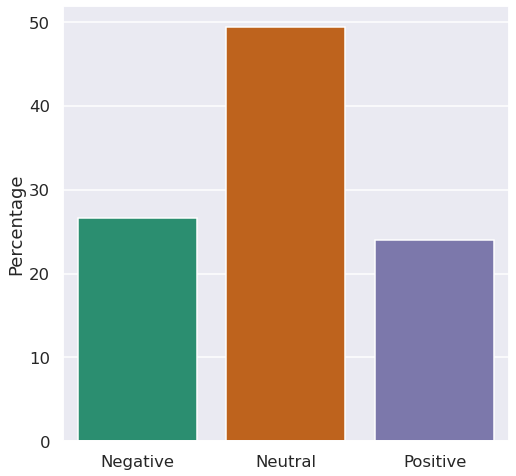

In [499]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [500]:
textblob_sentiment=[]
for s in saved_text:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [501]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [502]:
df_textblob

,Sentence,Polarity,Subjectivity
0,Lionel Messi Cristiano Ronaldo and the Pursui...,0.000000,0.000000
1,On Day of Well s Day Happiness Challenge ...,0.366667,0.133333
2,Benedict s Burial Leaves Francis Alone and Un...,0.000000,0.000000
3,Tell Us About Your Strangest Terms of Endearment,0.000000,0.000000
4,Did you follow the news this week Take our quiz,0.000000,0.000000
...,...,...,...
74,Is New York Turning Into Los Angeles,0.136364,0.454545
75,Read the Veggie Newsletter,0.000000,0.000000
76,Don t Cancel Those Plans,0.000000,0.000000
77,Ukraine s Quest to Build a Tank Killing Grenade,0.000000,0.000000


In [503]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      79 non-null     object 
 1   Polarity      79 non-null     float64
 2   Subjectivity  79 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


Text(0.5, 15.439999999999998, 'Sentence Polarity (Textblob)')

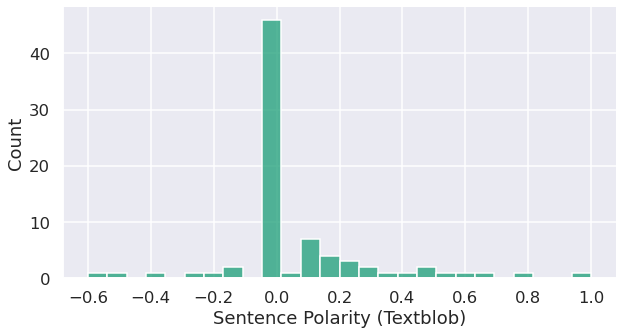

In [504]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 15.439999999999998, 'Sentence Subjectivity (Textblob)')

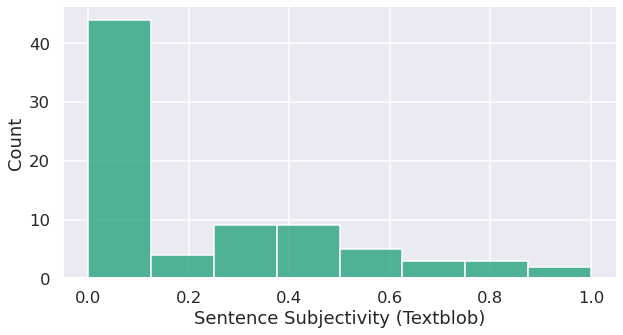

In [505]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [506]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [507]:
stop_tokens = []
stop_tokens_plot = []

def process_text(headlines):
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        stop_tokens.extend(toks)
        stop_tokens_plot.append(toks)
    
    return stop_tokens

process_text(saved_text)


['lionel',
 'messi',
 'cristiano',
 'ronaldo',
 'pursuit',
 'commercial',
 'supremacy',
 'day',
 'well',
 'day',
 'happiness',
 'challenge',
 'put',
 'social',
 'plan',
 'calendar',
 'benedict',
 'burial',
 'leaves',
 'francis',
 'alone',
 'unbound',
 'tell',
 'us',
 'strangest',
 'terms',
 'endearment',
 'follow',
 'news',
 'week',
 'take',
 'quiz',
 'review',
 'age',
 'vice',
 'skeptical',
 'take',
 'revolution',
 'u',
 'approves',
 'first',
 'vaccine',
 'honeybees',
 'ukraine',
 'teaches',
 'us',
 'power',
 'suspect',
 'bike',
 'path',
 'killing',
 'faces',
 'first',
 'death',
 'penalty',
 'trial',
 'biden',
 'lawmaker',
 'victory',
 'may',
 'cost',
 'coveted',
 'manhattan',
 'apartment',
 'editorial',
 'board',
 'bank',
 'executive',
 'accused',
 'urinating',
 'fellow',
 'air',
 'india',
 'passenger',
 'take',
 'quiz',
 'strong',
 'relationships',
 'speaker',
 'fight',
 'final',
 'hours',
 'arm',
 'twisting',
 'flaring',
 'tempers',
 'turn',
 'every',
 'page',
 'review',
 'best',
 

In [508]:
flat_tokens = [item for sublist in stop_tokens_plot for item in sublist] 
flat_tokens

['lionel',
 'messi',
 'cristiano',
 'ronaldo',
 'pursuit',
 'commercial',
 'supremacy',
 'day',
 'well',
 'day',
 'happiness',
 'challenge',
 'put',
 'social',
 'plan',
 'calendar',
 'benedict',
 'burial',
 'leaves',
 'francis',
 'alone',
 'unbound',
 'tell',
 'us',
 'strangest',
 'terms',
 'endearment',
 'follow',
 'news',
 'week',
 'take',
 'quiz',
 'review',
 'age',
 'vice',
 'skeptical',
 'take',
 'revolution',
 'u',
 'approves',
 'first',
 'vaccine',
 'honeybees',
 'ukraine',
 'teaches',
 'us',
 'power',
 'suspect',
 'bike',
 'path',
 'killing',
 'faces',
 'first',
 'death',
 'penalty',
 'trial',
 'biden',
 'lawmaker',
 'victory',
 'may',
 'cost',
 'coveted',
 'manhattan',
 'apartment',
 'editorial',
 'board',
 'bank',
 'executive',
 'accused',
 'urinating',
 'fellow',
 'air',
 'india',
 'passenger',
 'take',
 'quiz',
 'strong',
 'relationships',
 'speaker',
 'fight',
 'final',
 'hours',
 'arm',
 'twisting',
 'flaring',
 'tempers',
 'turn',
 'every',
 'page',
 'review',
 'best',
 

In [509]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('new', 7),
 ('l', 6),
 ('take', 5),
 ('u', 5),
 ('first', 5),
 ('mccarthy', 5),
 ('n', 5),
 ('f', 5),
 ('day', 4),
 ('plan', 4),
 ('path', 4),
 ('best', 4),
 ('kevin', 4),
 ('damar', 4),
 ('hamlin', 4),
 ('prince', 4),
 ('harry', 4),
 ('love', 4),
 ('put', 3),
 ('week', 3)]

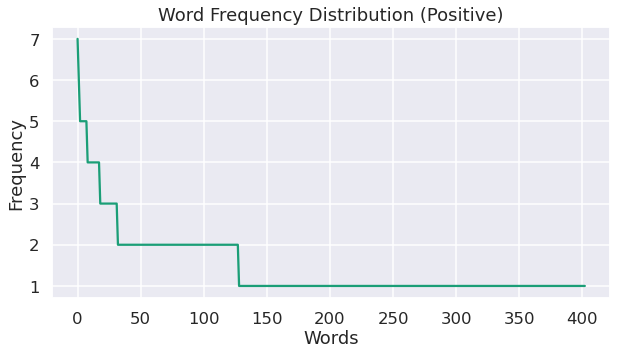

In [510]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

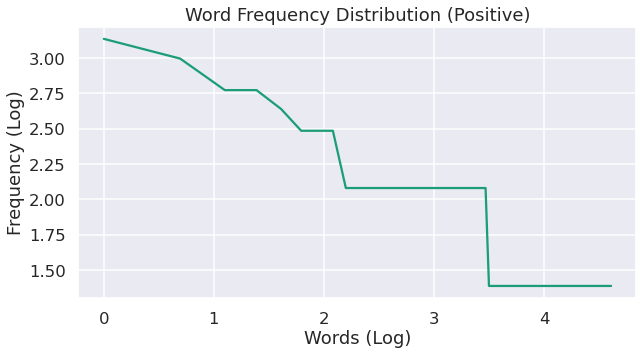

In [511]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [512]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('new', 8),
 ('damar', 7),
 ('hamlin', 7),
 ('l', 7),
 ('take', 6),
 ('u', 6),
 ('first', 6),
 ('n', 6),
 ('f', 6),
 ('path', 5),
 ('mccarthy', 5),
 ('prince', 5),
 ('harry', 5),
 ('day', 4),
 ('plan', 4),
 ('killing', 4),
 ('death', 4),
 ('fight', 4),
 ('best', 4),
 ('kevin', 4)]

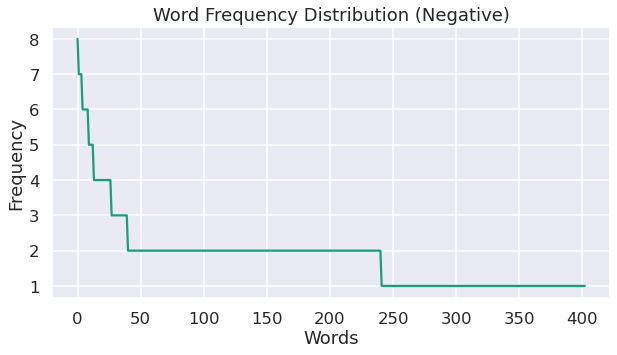

In [513]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

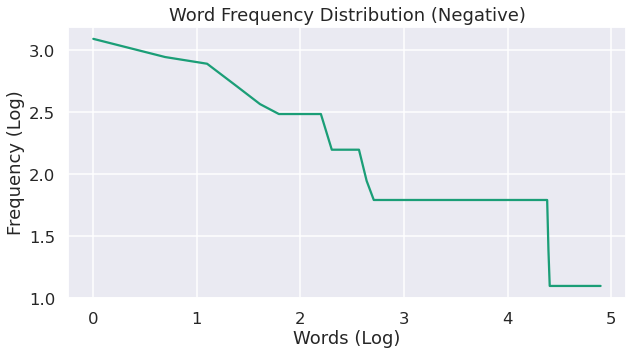

In [514]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [515]:
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
stem_tokens = []
for t in stop_tokens:
    if len(t) > 1:
        lemma = ls.lemmatize(t) 
        stem_tokens.append(lemma)

In [516]:
stem_tokens

['lionel',
 'messi',
 'cristiano',
 'ronaldo',
 'pursuit',
 'commercial',
 'supremacy',
 'day',
 'well',
 'day',
 'happiness',
 'challenge',
 'put',
 'social',
 'plan',
 'calendar',
 'benedict',
 'burial',
 'leaf',
 'francis',
 'alone',
 'unbound',
 'tell',
 'u',
 'strangest',
 'term',
 'endearment',
 'follow',
 'news',
 'week',
 'take',
 'quiz',
 'review',
 'age',
 'vice',
 'skeptical',
 'take',
 'revolution',
 'approves',
 'first',
 'vaccine',
 'honeybee',
 'ukraine',
 'teach',
 'u',
 'power',
 'suspect',
 'bike',
 'path',
 'killing',
 'face',
 'first',
 'death',
 'penalty',
 'trial',
 'biden',
 'lawmaker',
 'victory',
 'may',
 'cost',
 'coveted',
 'manhattan',
 'apartment',
 'editorial',
 'board',
 'bank',
 'executive',
 'accused',
 'urinating',
 'fellow',
 'air',
 'india',
 'passenger',
 'take',
 'quiz',
 'strong',
 'relationship',
 'speaker',
 'fight',
 'final',
 'hour',
 'arm',
 'twisting',
 'flaring',
 'temper',
 'turn',
 'every',
 'page',
 'review',
 'best',
 'warm',
 'dynamic'

In [517]:
filtered_tokens = [i for i in stem_tokens if len(i) > 1]



In [518]:
tokens = []

tokenizer = RegexpTokenizer(r'\w+')
for i in saved_text:
    tokens.append(tokenizer.tokenize(i))
flat_tokens = [item for sublist in tokens for item in sublist] #flatten list of lists



In [519]:
from collections import Counter
my_counter = Counter(filtered_tokens)
# my_counter.most_common(25)

word_freq = pd.DataFrame(my_counter.most_common(25),
                             columns=['words', 'count'])
word_freq.head()

,words,count
0,new,8
1,damar,7
2,hamlin,7
3,plan,6
4,take,6


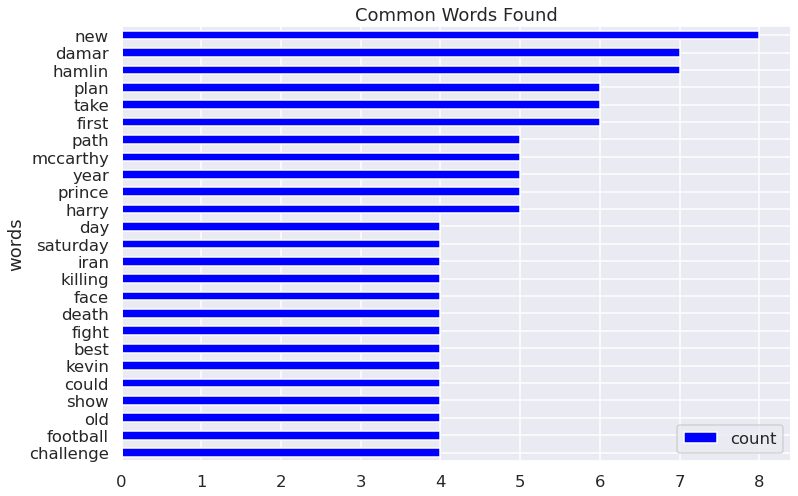

In [520]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Words Found")
plt.show()